# Installation librairies

# Import librairies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DATA IMPORT:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# chemins
path = '/content/drive/MyDrive/ICU/'
path_down = '/content/drive/MyDrive/ICU/Download_data/'
path_analyse = '/content/drive/MyDrive/ICU/Analyse/'
path_carto = '/content/drive/MyDrive/ICU/Carto/'

# Dataset import

In [6]:
#Import datasets
df_final = pd.read_csv(path_analyse+'Station_analyse_all.csv',sep=';', low_memory=False)
df_final.head(3)

,id_numero,longitude,latitude,altitude,id_nom,lcz,ville,geopoint,delta_temperature,ICU,Surface Batiments,Hauteur moyenne des batiments,Surface Zones Humides:,Surface Espaces Verts,Nombre d'arbres,Surface Zones Pietonnes + Parking,Surface diverses (non categorisee),Population_totale_300m,Nb entreprises
0,1,1.373733,43.574416,157.60,01-station-meteo-toulouse-meteopole,5,Toulouse,"43.57441578, 1.373732608",1.501774,657.0,32733.08,3.73,2253.05,107236.43,106,10926.23,129594.56,142,0
1,11,1.478675,43.607630,142.61,11-station-meteo-toulouse-soupetard,6,Toulouse,"43.60763006, 1.478675314",0.960492,39.0,60021.08,3.00,576.28,8452.34,236,2653.05,211040.59,1208,92
2,13,1.448637,43.563965,233.25,13-station-meteo-toulouse-pech-david,11,Toulouse,"43.56396456, 1.448637078",0.440072,194.0,3029.09,3.00,349.83,104560.51,1,15279.08,159524.84,414,0


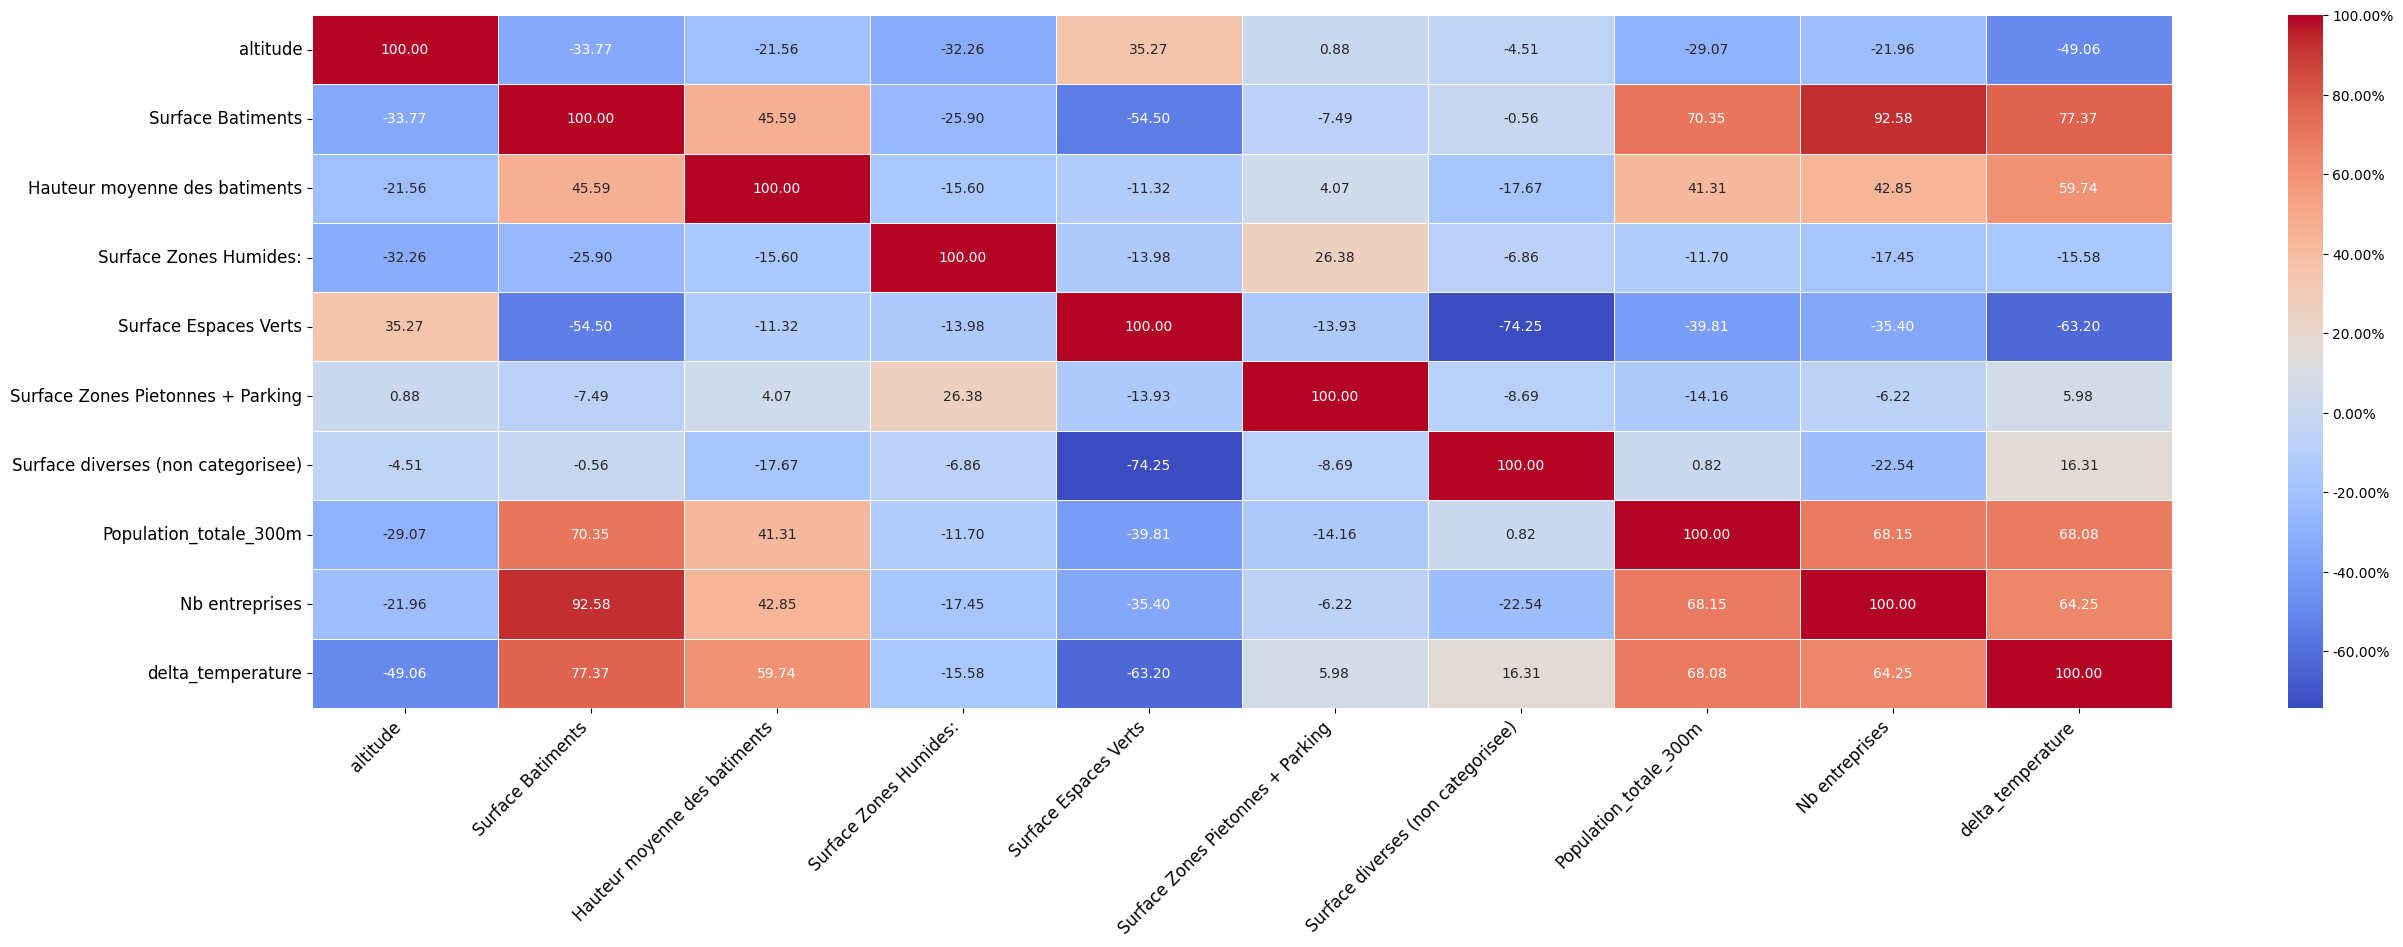

In [10]:
numerical_features = df_final[[#'ICU'	,
                               'altitude',
                               'Surface Batiments',	'Hauteur moyenne des batiments',
                               'Surface Zones Humides:',	'Surface Espaces Verts',
                               #'Nombre d\'arbres',
                               'Surface Zones Pietonnes + Parking',	'Surface diverses (non categorisee)',
                               'Population_totale_300m',	'Nb entreprises',
                               'delta_temperature']]

# Définir la taille de la figure pour s'assurer que tout est lisible
plt.figure(figsize=(30, 9))

# Générer la heatmap avec les corrélations, en ajoutant les annotations
sns.heatmap(
    numerical_features.corr()*100,  # Matrice de corrélation
    annot=True,                # Ajouter les annotations des valeurs
    cmap='coolwarm',           # Palette de couleurs pour la heatmap
    fmt='.2f',                 # Format des annotations (deux décimales)
    cbar_kws={'format': '%.2f%%'},
    linewidths=0.5,            # Espacement entre les cellules
    annot_kws={"size": 10}     # Taille des annotations
)

# Ajuster l'affichage pour éviter que les labels ne se chevauchent
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Sauvegarder le graphique en tant qu'image PNG
plt.savefig('Matrice.png', bbox_inches='tight')

# Afficher la heatmap
plt.show()